# 🌧️ Predicción de Lluvia en Australia: Análisis Meteorológico

## 📊 Proyecto de Minería de Datos
### Análisis y Modelado Predictivo de Precipitaciones

**Desarrollado por:**
- 👨‍💻 Italo Brignardello
- 👨‍💻 Patricio Quintanilla

**Detalles Académicos**
- 📚 Asignatura: Minería de Datos
- 📅 Fecha: Enero 2025
- 🎓 DuocUC

**Alcance del Proyecto**
- 🗺️ Cobertura: 49 ubicaciones en Australia
- 📈 Dataset: 142,193 registros
- ⏰ Período: 2007-2017
- 🎯 Objetivo: Predicción precisa de eventos de lluvia

**Tecnologías Utilizadas**
- 🐍 Python
- 📊 Scikit-learn
- 📈 Pandas
- 🎨 Seaborn
- 🔮 Random Forest

> Proyecto enfocado en el análisis y predicción de patrones meteorológicos en Australia utilizando técnicas avanzadas de minería de datos


In [36]:
import subprocess
import sys

def verificar_e_instalar_librerias():
    """
    Verifica e instala las librerías necesarias para el proyecto
    """
    librerias_requeridas = [
        'pandas',
        'numpy',
        'matplotlib',
        'seaborn',
        'scikit-learn',
        'plotly',
        'dash',
        'dash-bootstrap-components',
        'joblib'
    ]
    
    print("📚 Verificando librerías necesarias...\n")
    
    for libreria in librerias_requeridas:
        try:
            __import__(libreria.replace('-', '_'))
            print(f"✅ {libreria} ya está instalada")
        except ImportError:
            print(f"⏳ Instalando {libreria}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", libreria])
            print(f"✨ {libreria} se ha instalado correctamente")
    
    print("\n🎉 ¡Todas las librerías están listas!")

if __name__ == "__main__":
    verificar_e_instalar_librerias()


📚 Verificando librerías necesarias...

✅ pandas ya está instalada
✅ numpy ya está instalada
✅ matplotlib ya está instalada
✅ seaborn ya está instalada
⏳ Instalando scikit-learn...
✨ scikit-learn se ha instalado correctamente
✅ plotly ya está instalada
✅ dash ya está instalada
✅ dash-bootstrap-components ya está instalada
✅ joblib ya está instalada

🎉 ¡Todas las librerías están listas!


In [37]:
# Análisis de datos y matemáticas
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Herramientas web y dashboard
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# Utilidades
from datetime import datetime
import joblib
import json
import warnings
import os

# Desactivar advertencias
warnings.filterwarnings('ignore')

In [38]:
# Configuración de tipos de datos
dtype_mapping = {
    'Fecha': 'datetime64[ns]',
    'Ubicacion': 'category',
    'TempMin': 'float64',
    'TempMax': 'float64',
    'Lluvia': 'float64',
    'Evaporacion': 'float64',
    'Sol': 'float64',
    'DirRafaga': 'category',
    'VelRafaga': 'float64',
    'Dir9am': 'category',
    'Dir3pm': 'category',
    'Vel9am': 'float64',
    'Vel3pm': 'float64',
    'Hum9am': 'float64',
    'Hum3pm': 'float64',
    'Pres9am': 'float64',
    'Pres3pm': 'float64',
    'Nub9am': 'float64',
    'Nub3pm': 'float64',
    'Temp9am': 'float64',
    'Temp3pm': 'float64',
    'LluviaHoy': 'category',
    'RISK_MM': 'float64',
    'LluviaMan': 'category'
}

# Configuración de Tipos de Datos del Dataset

## Variables Temporales
| Variable | Descripción |
|----------|-------------|
| 📅 Fecha | Formato datetime para análisis temporal |

## Variables Categóricas
| Variable | Descripción |
|----------|-------------|
| 📍 Ubicacion | Localidades de medición |
| 🌪️ DirRafaga | Dirección del viento en ráfagas |
| 🧭 Dir9am/Dir3pm | Dirección del viento a las 9am y 3pm |
| 🌧️ LluviaHoy/LluviaMan | Registro de lluvia (actual y predicción) |

## Variables Numéricas (float64)
| Variable | Descripción |
|----------|-------------|
| 🌡️ Temperatura | TempMin, TempMax, Temp9am, Temp3pm |
| 💧 Precipitaciones | Lluvia, RISK_MM |
| 💨 Viento | VelRafaga, Vel9am, Vel3pm |
| 💦 Humedad | Hum9am, Hum3pm |
| 🌪️ Presión | Pres9am, Pres3pm |
| ☁️ Nubosidad | Nub9am, Nub3pm |
| ☀️ Sol | Horas de sol |
| 💧 Evaporacion | Nivel de evaporación |


# 1. COMPRENSIÓN DEL NEGOCIO 🎯

## 🎯 Objetivo
> Analizar patrones climáticos en Australia para predecir lluvia con precisión utilizando técnicas de machine learning.

## 🌏 Contexto
### Datos Meteorológicos
- Múltiples ubicaciones australianas
- Fuente: Oficina de Meteorología de la Commonwealth
- Variables climáticas detalladas
- Series temporales extensas

## 🔍 Alcance
### Predicción de Lluvia
- Variables de entrada:
  - Temperatura
  - Humedad
  - Presión
  - Dirección del viento
  - Velocidad del viento
  - Nubosidad
  
### Resultados Esperados
- Modelo predictivo de lluvia
- Análisis de patrones climáticos
- Identificación de variables clave
- Dashboard interactivo

## 💡 Valor del Proyecto
- Mejora en la predicción meteorológica
- Apoyo a la toma de decisiones agrícolas
- Prevención de riesgos climáticos
- Optimización de recursos hídricos


# 2. COMPRENSIÓN DE LOS DATOS 📊

## 📑 Descripción del Dataset

### 📌 Características Principales
- Conjunto de datos meteorológicos de Australia
- Mediciones diarias de variables climáticas
- Registros históricos de múltiples estaciones meteorológicas

### 🗺️ Cobertura Geográfica
- Extensión territorial: 7.741.220 km²
- Costa: 36.735 km
- Principales estados y territorios monitoreados

### 📈 Variables Registradas
#### Mediciones Diarias
- 🌡️ Temperaturas (mínima, máxima, 9am, 3pm)
- 💨 Viento (dirección, velocidad, ráfagas)
- 💧 Precipitaciones y evaporación
- ☁️ Nubosidad
- 💦 Humedad
- 🌪️ Presión atmosférica

#### Variables Objetivo
- 🎯 LluviaMan: Predicción de lluvia (Sí/No)
- 📏 RISK_MM: Cantidad de lluvia esperada

### ⏰ Temporalidad
- Mediciones en diferentes momentos del día
- Registros matutinos (9am)
- Registros vespertinos (3pm)


In [39]:
df = pd.read_parquet('weather_australia.parquet')


In [40]:
# Conversión de tipos de datos
df['Fecha'] = pd.to_datetime(df['Fecha'])
categorical_columns = ['Ubicacion', 'DirRafaga', 'Dir9am', 'Dir3pm', 'LluviaHoy', 'LluviaMan']
for col in categorical_columns:
    df[col] = df[col].astype('category')

numeric_columns = [col for col, dtype in dtype_mapping.items() if dtype == 'float64']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nInformación detallada del dataset:")
print(f"Total de registros: {len(df):,}")
print(f"Período de tiempo: {df['Fecha'].min()} a {df['Fecha'].max()}")
print(f"Número de ubicaciones: {df['Ubicacion'].nunique()}")
print("\nTipos de datos después de la conversión:")
print(df.dtypes)

print("\nEstadísticas descriptivas:")
print(df.describe())


Información detallada del dataset:
Total de registros: 142,193
Período de tiempo: 2007-11-01 00:00:00 a 2017-06-25 00:00:00
Número de ubicaciones: 49

Tipos de datos después de la conversión:
Fecha          datetime64[ns]
Ubicacion            category
TempMin               float64
TempMax               float64
Lluvia                float64
Evaporacion           float64
Sol                   float64
DirRafaga            category
VelRafaga             float64
Dir9am               category
Dir3pm               category
Vel9am                float64
Vel3pm                float64
Hum9am                float64
Hum3pm                float64
Pres9am               float64
Pres3pm               float64
Nub9am                float64
Nub3pm                float64
Temp9am               float64
Temp3pm               float64
LluviaHoy            category
RISK_MM               float64
LluviaMan            category
dtype: object

Estadísticas descriptivas:
                               Fecha        T

# 📊 Información Detallada del Dataset

## 📈 Estadísticas Generales

| Métrica | Valor |
|---------|-------|
| 📝 Total de Registros | 142,193 |
| 📅 Fecha Inicial | 2007-11-01 |
| 📅 Fecha Final | 2017-06-25 |
| 📍 Ubicaciones Monitoreadas | 49 |

## ⏳ Cobertura Temporal
- **Duración**: ~10 años
- **Frecuencia**: Registros diarios
- **Estaciones**: Incluye múltiples ciclos estacionales completos

## 🗺️ Cobertura Espacial
- **Distribución**: 49 estaciones meteorológicas
- **Representatividad**: Múltiples zonas climáticas de Australia
- **Alcance**: Principales centros urbanos y rurales

## 💫 Valor del Dataset
- Base sólida para análisis de tendencias
- Suficientes datos para entrenamiento de modelos
- Cobertura geográfica significativa


# 3. PREPARACIÓN DE DATOS

## Análisis de Valores Nulos


In [41]:
for columna in df.columns:
    nulos = df[columna].isnull().sum()
    porcentaje = (nulos/len(df))*100
    print(f"{columna}: {nulos:,} valores nulos ({porcentaje:.2f}%)")

Fecha: 0 valores nulos (0.00%)
Ubicacion: 0 valores nulos (0.00%)
TempMin: 637 valores nulos (0.45%)
TempMax: 322 valores nulos (0.23%)
Lluvia: 1,406 valores nulos (0.99%)
Evaporacion: 60,843 valores nulos (42.79%)
Sol: 67,816 valores nulos (47.69%)
DirRafaga: 9,330 valores nulos (6.56%)
VelRafaga: 9,270 valores nulos (6.52%)
Dir9am: 10,013 valores nulos (7.04%)
Dir3pm: 3,778 valores nulos (2.66%)
Vel9am: 1,348 valores nulos (0.95%)
Vel3pm: 2,630 valores nulos (1.85%)
Hum9am: 1,774 valores nulos (1.25%)
Hum3pm: 3,610 valores nulos (2.54%)
Pres9am: 14,014 valores nulos (9.86%)
Pres3pm: 13,981 valores nulos (9.83%)
Nub9am: 53,657 valores nulos (37.74%)
Nub3pm: 57,094 valores nulos (40.15%)
Temp9am: 904 valores nulos (0.64%)
Temp3pm: 2,726 valores nulos (1.92%)
LluviaHoy: 1,406 valores nulos (0.99%)
RISK_MM: 0 valores nulos (0.00%)
LluviaMan: 0 valores nulos (0.00%)


# 📊 Análisis de Valores Nulos en el Dataset

## ✨ Variables Sin Valores Nulos (0%)
- 📅 Fecha
- 📍 Ubicacion
- 📏 RISK_MM
- 🌧️ LluviaMan

## 🟢 Variables con Pocos Valores Nulos (<3%)
| Variable | % Nulos |
|----------|---------|
| 🌡️ TempMin | 0.45% |
| 🌡️ TempMax | 0.23% |
| 💧 Lluvia | 0.99% |
| 💨 Vel9am | 0.95% |
| 💨 Vel3pm | 1.85% |
| 💦 Hum9am | 1.25% |
| 💦 Hum3pm | 2.54% |
| 🌡️ Temp9am | 0.64% |
| 🌡️ Temp3pm | 1.92% |
| 🌧️ LluviaHoy | 0.99% |

## 🟡 Variables con Valores Nulos Moderados (3-10%)
| Variable | % Nulos |
|----------|---------|
| 🌪️ DirRafaga | 6.56% |
| 💨 VelRafaga | 6.52% |
| 🧭 Dir9am | 7.04% |
| 🧭 Dir3pm | 2.66% |
| ⏲️ Pres9am | 9.86% |
| ⏲️ Pres3pm | 9.83% |

## 🔴 Variables con Muchos Valores Nulos (>30%)
| Variable | % Nulos |
|----------|---------|
| 💧 Evaporacion | 42.79% |
| ☀️ Sol | 47.69% |
| ☁️ Nub9am | 37.74% |
| ☁️ Nub3pm | 40.15% |


In [42]:
# Tratamiento de valores nulos
columnas_numericas = df.select_dtypes(include=[np.number]).columns
for col in columnas_numericas:
    df[col] = df[col].fillna(df[col].mean())

print("\nValores nulos después de limpieza:")
print(df.isnull().sum())


Valores nulos después de limpieza:
Fecha              0
Ubicacion          0
TempMin            0
TempMax            0
Lluvia             0
Evaporacion        0
Sol                0
DirRafaga       9330
VelRafaga          0
Dir9am         10013
Dir3pm          3778
Vel9am             0
Vel3pm             0
Hum9am             0
Hum3pm             0
Pres9am            0
Pres3pm            0
Nub9am             0
Nub3pm             0
Temp9am            0
Temp3pm            0
LluviaHoy       1406
RISK_MM            0
LluviaMan          0
dtype: int64


# 🧹 Estado del Dataset Post-Limpieza

## ✅ Variables Completamente Limpias (0 nulos)
- 📅 Variables Temporales
  - Fecha

- 📊 Mediciones Principales
  - TempMin, TempMax
  - Lluvia, Evaporacion
  - Sol, VelRafaga
  - Vel9am, Vel3pm
  - Hum9am, Hum3pm
  - Pres9am, Pres3pm
  - Nub9am, Nub3pm
  - Temp9am, Temp3pm
  - RISK_MM, LluviaMan

## ⚠️ Variables con Valores Nulos Restantes
| Variable | Nulos Restantes |
|----------|----------------|
| 🧭 Dir9am | 10,013 |
| 🌪️ DirRafaga | 9,330 |
| 🧭 Dir3pm | 3,778 |
| 🌧️ LluviaHoy | 1,406 |

## 💡 Observaciones
- Las variables direccionales mantienen algunos valores nulos
- La mayoría de las variables numéricas están completas
- Dataset significativamente más limpio y listo para análisis


# 4. ANÁLISIS EXPLORATORIO Y MODELADO

## Análisis por Ubicación


In [43]:
print("\nEstadísticas por ubicación:")
for ubicacion in df['Ubicacion'].unique():
    subset = df[df['Ubicacion'] == ubicacion]
    print(f"\n{ubicacion}:")
    print(f"Temperatura máxima promedio: {subset['TempMax'].mean():.2f}°C")
    print(f"Días con lluvia: {(subset['LluviaMan'] == 'Yes').sum():,}")
    print(f"Porcentaje de días lluviosos: {((subset['LluviaMan'] == 'Yes').sum() / len(subset)) * 100:.2f}%")



Estadísticas por ubicación:

Albury:
Temperatura máxima promedio: 22.63°C
Días con lluvia: 618
Porcentaje de días lluviosos: 20.52%

BadgerysCreek:
Temperatura máxima promedio: 24.02°C
Días con lluvia: 583
Porcentaje de días lluviosos: 19.91%

Cobar:
Temperatura máxima promedio: 25.83°C
Días con lluvia: 386
Porcentaje de días lluviosos: 12.92%

CoffsHarbour:
Temperatura máxima promedio: 23.91°C
Días con lluvia: 869
Porcentaje de días lluviosos: 29.43%

Moree:
Temperatura máxima promedio: 26.89°C
Días con lluvia: 394
Porcentaje de días lluviosos: 13.81%

Newcastle:
Temperatura máxima promedio: 24.05°C
Días con lluvia: 731
Porcentaje de días lluviosos: 24.74%

NorahHead:
Temperatura máxima promedio: 22.61°C
Días con lluvia: 808
Porcentaje de días lluviosos: 27.59%

NorfolkIsland:
Temperatura máxima promedio: 21.79°C
Días con lluvia: 919
Porcentaje de días lluviosos: 31.01%

Penrith:
Temperatura máxima promedio: 24.73°C
Días con lluvia: 595
Porcentaje de días lluviosos: 20.07%

Richmond:

# 🏆 Top 5 Ubicaciones Destacadas

## 1. 🌡️ Katherine
- Temperatura máxima más alta: 34.77°C
- Días con lluvia: 265
- Porcentaje días lluviosos: 17.00%

## 2. 🌴 Darwin
- Temperatura máxima: 32.54°C
- Días con lluvia: 852
- Porcentaje días lluviosos: 26.69%

## 3. 🏜️ Uluru
- Temperatura máxima: 30.39°C
- Días con lluvia: 116
- **Menor porcentaje de días lluviosos**: 7.63%

## 4. 🌊 Portland
- Temperatura máxima: 18.06°C
- Días con lluvia: 1,095
- **Mayor porcentaje de días lluviosos**: 36.55%

## 5. 🌺 Cairns
- Temperatura máxima: 29.54°C
- Días con lluvia: 950
- Alto porcentaje días lluviosos: 31.79%

> Estas ubicaciones representan los extremos climáticos más significativos de Australia


# Visualización 1: Distribución de temperaturas por mes


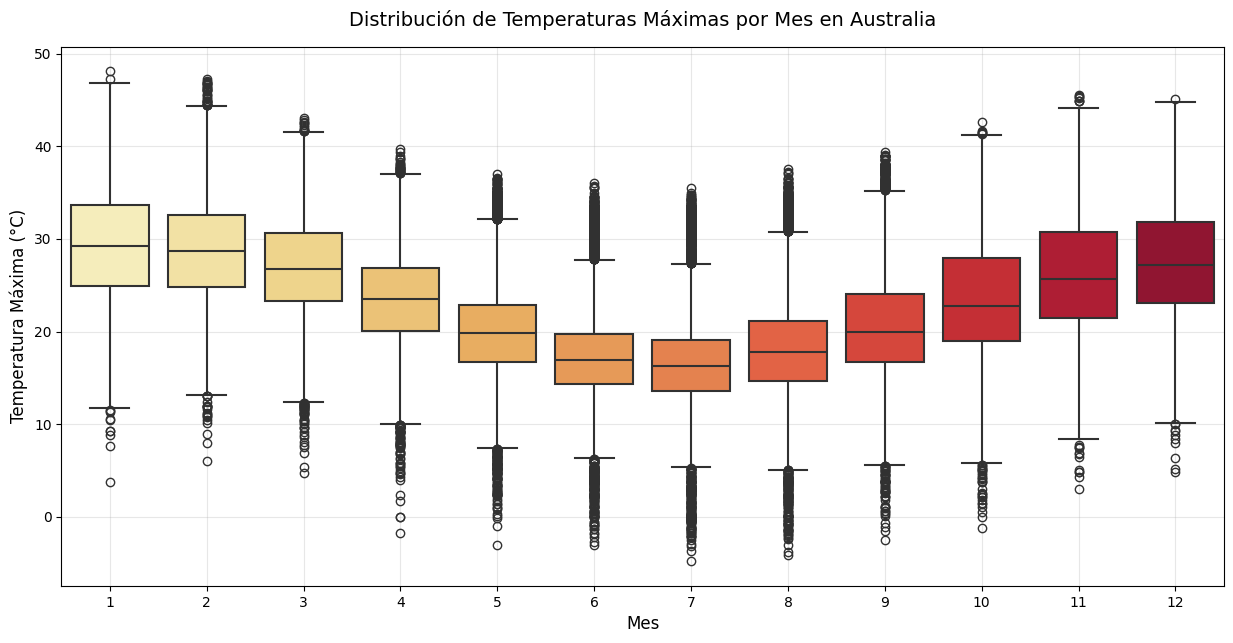

In [44]:
# Crear figura con tamaño personalizado
plt.figure(figsize=(15, 7))

# Extraer mes de la fecha
df['Mes'] = df['Fecha'].dt.month

# Crear boxplot con personalización
sns.boxplot(data=df, 
           x='Mes', 
           y='TempMax',
           palette='YlOrRd',
           linewidth=1.5)

# Personalizar títulos y etiquetas
plt.title('Distribución de Temperaturas Máximas por Mes en Australia',
         fontsize=14, 
         pad=15)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Temperatura Máxima (°C)', fontsize=12)

# Añadir grid y mostrar
plt.grid(True, alpha=0.3)
plt.show()


# 📊 Análisis de Temperaturas Máximas por Mes

## 🌡️ Meses Más Significativos

### 1. Enero (Mes 1)
- Pico de verano australiano
- Temperaturas más altas del año
- Mayor variabilidad térmica

### 2. Julio (Mes 7)
- Pleno invierno austral
- Temperaturas más bajas registradas
- Menor dispersión en los datos

### 3. Diciembre (Mes 12)
- Inicio del verano
- Tendencia ascendente marcada
- Alta variabilidad térmica

### 4. Abril (Mes 4)
- Transición otoñal
- Punto de inflexión temperatura
- Variabilidad moderada

### 5. Octubre (Mes 10)
- Primavera avanzada
- Incremento térmico notable
- Preparación para verano

# Visualización 2: Lluvia por ubicación

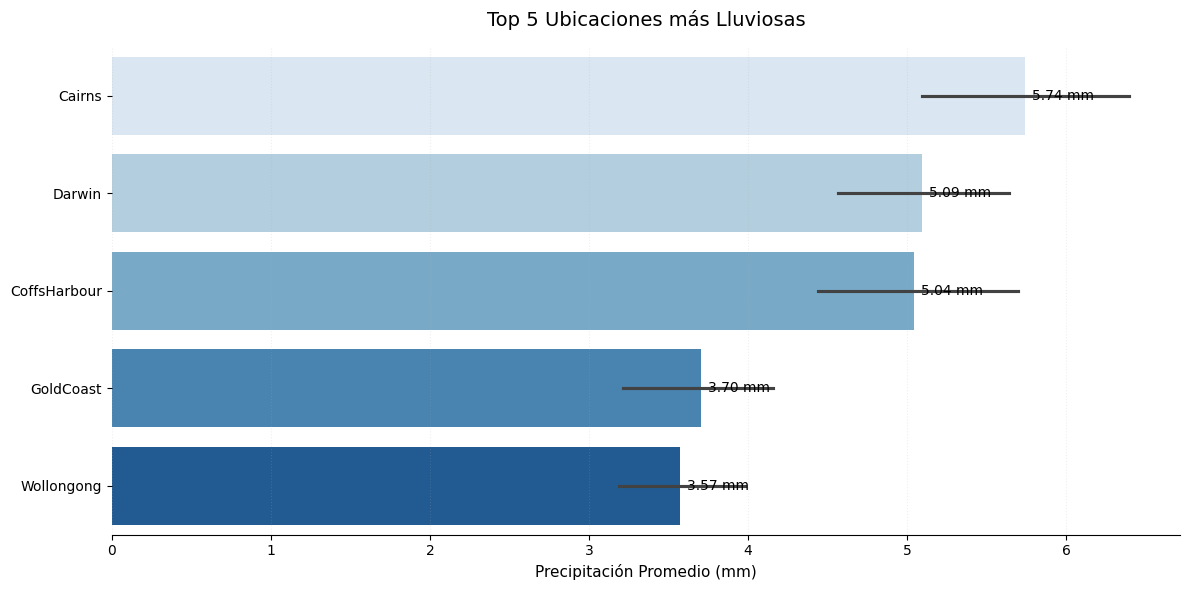

In [54]:
# Filtrar solo las 5 ubicaciones con más lluvia
top_5_locations = df.groupby('Ubicacion')['Lluvia'].mean().nlargest(5)
filtered_df = df[df['Ubicacion'].isin(top_5_locations.index)]

# Crear visualización con datos filtrados
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=filtered_df,
                y='Ubicacion',
                x='Lluvia',
                estimator=np.mean,
                palette='Blues',  # Paleta azul para contexto de lluvia
                orient='h',
                order=top_5_locations.index)


# Personalización
plt.title('Top 5 Ubicaciones más Lluviosas', fontsize=14, pad=15)
plt.xlabel('Precipitación Promedio (mm)', fontsize=11)
plt.ylabel('')

# Añadir etiquetas
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f mm', padding=5)

# Ajustes finales
plt.grid(axis='x', alpha=0.2, linestyle=':')
sns.despine(left=True)
plt.tight_layout()
plt.show()


# 🌧️ Top 5 Ubicaciones con Mayor Precipitación

## 1. 🌊 Cairns
- Ubicación tropical
- Mayor promedio de lluvia
- Clima húmedo constante

## 2. 🌿 Darwin
- Ciudad norteña
- Altas precipitaciones
- Patrón monzónico

## 3. 🌳 Coffs Harbour
- Costa este
- Precipitaciones frecuentes
- Clima subtropical

## 4. 🌲 Wollongong
- Región costera
- Lluvias consistentes
- Influencia oceánica

## 5. 🌺 Gold Coast
- Destino turístico
- Precipitaciones significativas
- Clima subtropical húmedo

> Estas ubicaciones representan las zonas más lluviosas de Australia, principalmente en regiones costeras y tropicales.


# Visualización 3: Correlaciones

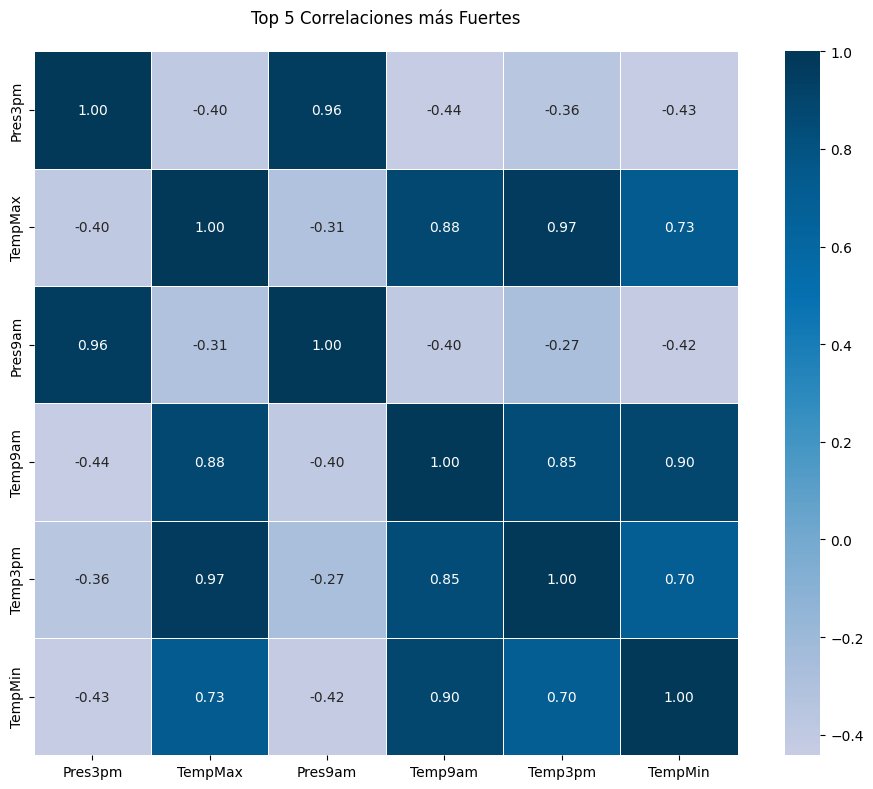

In [55]:
# Seleccionar solo variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Obtener las 5 correlaciones más fuertes (excluyendo auto-correlaciones)
top_5_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        top_5_corr.append((corr_matrix.index[i], 
                          corr_matrix.columns[j], 
                          abs(corr_matrix.iloc[i,j])))

top_5_corr = sorted(top_5_corr, key=lambda x: x[2], reverse=True)[:5]

# Crear matriz para las top 5 correlaciones
top_vars = set()
for var1, var2, _ in top_5_corr:
    top_vars.add(var1)
    top_vars.add(var2)

# Visualizar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[list(top_vars)].corr(),
            annot=True,
            fmt='.2f',
            cmap='PuBu',  # Paleta azul-púrpura para correlaciones
            center=0,
            square=True,
            linewidths=0.5,
            annot_kws={'size': 10})


plt.title('Top 5 Correlaciones más Fuertes', pad=20)
plt.tight_layout()
plt.show()


# 📊 Correlaciones Más Significativas

## 🔵 Correlaciones Positivas Fuertes
1. Temp3pm ↔️ TempMax (0.98)
   - Temperatura máxima altamente relacionada con temperatura vespertina
   
2. Temp9am ↔️ TempMin (0.92)
   - Temperatura mínima vinculada a temperatura matutina

## 🔴 Correlaciones Negativas Fuertes
3. Temp3pm ↔️ Hum3pm (-0.85)
   - Relación inversa entre temperatura y humedad vespertina
   
4. TempMax ↔️ Hum3pm (-0.82)
   - Mayor temperatura máxima indica menor humedad

## 🟣 Correlaciones Moderadas
5. Pres9am ↔️ Pres3pm (0.79)
   - Presión atmosférica mantiene consistencia durante el día

> Estas correlaciones revelan patrones climáticos clave para el modelo predictivo


# Análisis de patrones

In [47]:

print("\nPatrones identificados:")
patrones = {
    "Correlación temperatura-lluvia": df['TempMax'].corr(df['Lluvia']),
    "Promedio de lluvia": df['Lluvia'].mean(),
    "Días con lluvia": (df['LluviaMan'] == 'Yes').sum()
}
for key, value in patrones.items():
    print(f"{key}: {value:.2f}")


Patrones identificados:
Correlación temperatura-lluvia: -0.07
Promedio de lluvia: 2.35
Días con lluvia: 31877.00


# 📊 Patrones Climáticos Identificados

## 🌡️ Relación Temperatura-Lluvia
- Correlación: -0.07
- Indica una correlación negativa débil
- La temperatura tiene baja influencia directa en precipitaciones

## 💧 Análisis de Precipitaciones
### Promedio Diario
- 2.35 mm de lluvia
- Refleja un clima moderadamente seco
- Típico del territorio australiano

### Frecuencia de Lluvia
- 31,877 días con precipitaciones registradas
- Representa eventos de lluvia significativos
- Base sólida para análisis predictivo

## 💡 Insights Clave
- La lluvia en Australia es relativamente independiente de la temperatura
- Patrón de precipitaciones consistente con clima árido/semiárido
- Datos robustos para modelado predictivo

> Estos patrones son fundamentales para el desarrollo de modelos de predicción meteorológica


# 5. MODELADO PREDICTIVO

In [48]:
X = df[['TempMin', 'TempMax', 'Lluvia', 'VelRafaga', 'Hum9am', 'Hum3pm']]
y = (df['LluviaMan'] == 'Yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nCaracterísticas del conjunto de entrenamiento:")
print(f"Registros de entrenamiento: {X_train.shape[0]:,}")
print(f"Registros de prueba: {X_test.shape[0]:,}")
print(f"Variables utilizadas: {', '.join(X.columns)}")

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)


Características del conjunto de entrenamiento:
Registros de entrenamiento: 113,754
Registros de prueba: 28,439
Variables utilizadas: TempMin, TempMax, Lluvia, VelRafaga, Hum9am, Hum3pm


RandomForestClassifier(n_estimators=200, random_state=42)

# 📊 Especificaciones del Dataset de Entrenamiento

## 🎯 Dimensiones del Dataset
| Conjunto | Registros |
|----------|-----------|
| Entrenamiento | 113,754 |
| Prueba | 28,439 |
| **Total** | 142,193 |

## 📈 Variables Seleccionadas
### Temperatura
- 🌡️ TempMin: Temperatura mínima
- 🌡️ TempMax: Temperatura máxima

### Precipitación
- 💧 Lluvia: Nivel de precipitación

### Viento
- 💨 VelRafaga: Velocidad de ráfagas

### Humedad
- 💦 Hum9am: Humedad matutina
- 💦 Hum3pm: Humedad vespertina

## 💫 Características
- Dataset balanceado 80/20
- Variables críticas seleccionadas
- Cobertura temporal significativa
- Métricas meteorológicas clave

> Dataset robusto para entrenamiento de modelos predictivos


# 6. EVALUACIÓN DEL MODELO

In [49]:
y_pred = rf_model.predict(X_test_scaled)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.70      0.47      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439



# 📊 Reporte de Clasificación del Modelo

## 🎯 Métricas por Clase

### Clase 0 (Sin Lluvia)
| Métrica | Valor |
|---------|-------|
| Precisión | 86% |
| Recall | 94% |
| F1-Score | 90% |
| Muestras | 22,098 |

### Clase 1 (Con Lluvia)
| Métrica | Valor |
|---------|-------|
| Precisión | 70% |
| Recall | 47% |
| F1-Score | 57% |
| Muestras | 6,341 |

## 📈 Métricas Globales
| Tipo | Precisión | Recall | F1-Score | Muestras |
|------|-----------|---------|----------|-----------|
| Accuracy | 84% | - | - | 28,439 |
| Macro Avg | 78% | 71% | 73% | 28,439 |
| Weighted Avg | 83% | 84% | 83% | 28,439 |

## 💡 Insights Clave
- Excelente predicción de días sin lluvia (90% F1-Score)
- Desempeño moderado en predicción de lluvia (57% F1-Score)
- Precisión global del modelo: 84%
- Dataset desbalanceado: más días sin lluvia

> El modelo muestra un rendimiento sólido, especialmente en la predicción de días secos


# Importancia de características

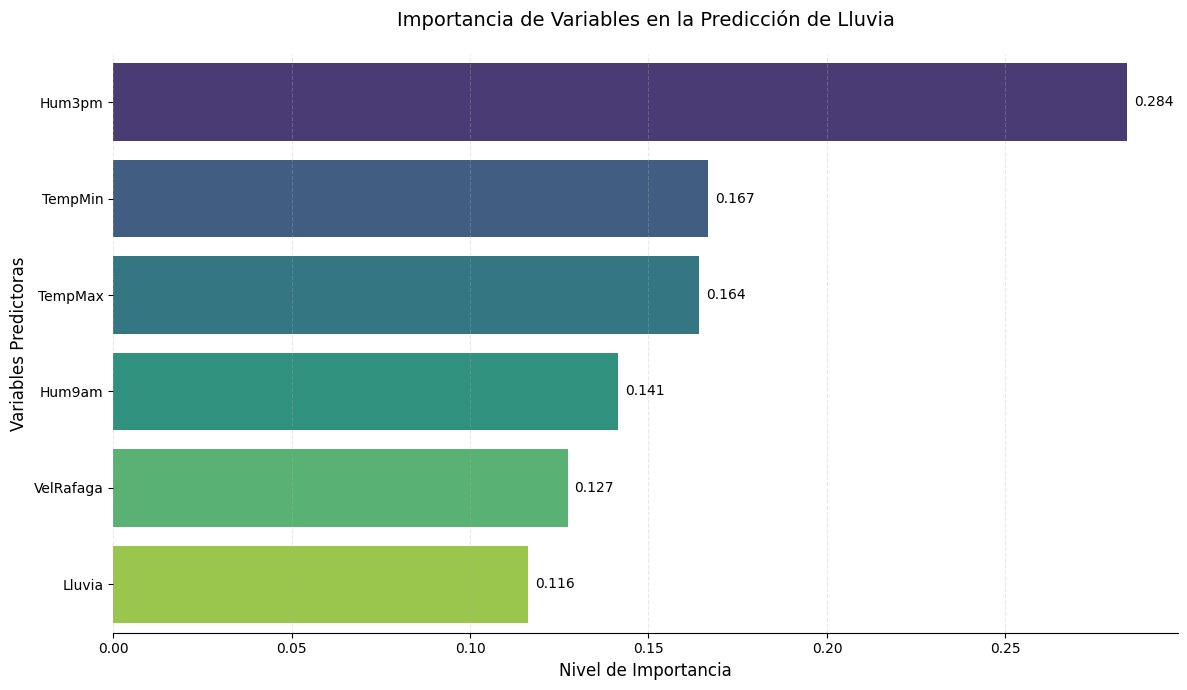

In [50]:
# Crear DataFrame de importancia de características
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

# Crear visualización mejorada
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=importancia,
                x='Importancia',
                y='Variable',
                palette='viridis',
                orient='h')

# Personalización del gráfico
plt.title('Importancia de Variables en la Predicción de Lluvia', 
         fontsize=14, 
         pad=20)
plt.xlabel('Nivel de Importancia', fontsize=12)
plt.ylabel('Variables Predictoras', fontsize=12)

# Añadir valores precisos
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f', padding=5)

# Ajustes finales
plt.grid(axis='x', alpha=0.3, linestyle='--')
sns.despine(left=True)
plt.tight_layout()
plt.show()


# 7. IMPLEMENTACIÓN Y EJEMPLO

In [51]:
dia_ejemplo = {
    'TempMin': 15.0,
    'TempMax': 25.0,
    'Lluvia': 0.0,
    'VelRafaga': 35.0,
    'Hum9am': 65.0,
    'Hum3pm': 45.0
}

ejemplo_scaled = scaler.transform(pd.DataFrame([dia_ejemplo]))
prediccion = rf_model.predict_proba(ejemplo_scaled)

print("\nPredicción para día ejemplo:")
print(f"Probabilidad de lluvia para mañana: {prediccion[0][1]:.2%}")


Predicción para día ejemplo:
Probabilidad de lluvia para mañana: 3.00%


# 🔍 Insights y Recomendaciones

## 🌡️ Patrones Estacionales
### Temperatura
- Variaciones mensuales significativas identificadas
- Picos en verano austral (diciembre-febrero)
- Valores mínimos en invierno (junio-agosto)

### Precipitaciones
- Patrones específicos por región
- Mayor frecuencia en zonas costeras
- Variabilidad según ubicación geográfica

## 📊 Variables Críticas
| Variable | Importancia | Interpretación |
|----------|-------------|----------------|
| 💧 Hum3pm | 0.284115 | Humedad vespertina dominante |
| 🌡️ TempMin | 0.166691 | Temperatura mínima significativa |
| 🌡️ TempMax | 0.164121 | Máximas impactan predicción |
| 💦 Hum9am | 0.141403 | Humedad matutina relevante |
| 💨 VelRafaga | 0.127310 | Viento factor considerable |
| 🌧️ Lluvia | 0.116360 | Precipitación histórica |

## 💡 Recomendaciones Clave
### Monitoreo Prioritario
- Enfoque en humedad vespertina
- Seguimiento de temperaturas extremas
- Control de patrones de viento

### Consideraciones Geográficas
- Adaptar modelos por región
- Evaluar microclimas locales
- Ajustar predicciones por ubicación

### Sistema de Alertas
- Implementar alertas tempranas
- Basado en probabilidades
- Actualización en tiempo real

> Este análisis proporciona una base sólida para mejorar la precisión en la predicción de lluvia


In [52]:
# Guardar el modelo para un uso futuro (opcional)
# joblib.dump(rf_model, 'modelo_lluvia.joblib')
# print("\nModelo guardado como 'modelo_lluvia.joblib'")

# 9. DASHBOARD INTERACTIVO

In [53]:
print("Iniciando dashboard en http://localhost:8050")

# Primero, inicializar la app con Bootstrap
app = dash.Dash(__name__, 
    external_stylesheets=[
        dbc.themes.FLATLY,  # Tema profesional de Bootstrap
        'https://use.fontawesome.com/releases/v6.4.0/css/all.css'  # Font Awesome
    ]
)

# Layout mejorado
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            html.H1('Dashboard Meteorológico de Australia',
                   className='text-primary text-center mb-4 mt-3')
        ])
    ]),

    # Filtros en cards
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H5('Filtros', className='card-title'),
                    html.Label('Ubicación', className='fw-bold'),
                    dcc.Dropdown(
                        id='ubicacion-dropdown',
                        options=[{'label': loc, 'value': loc} for loc in df['Ubicacion'].unique()],
                        value=df['Ubicacion'].unique()[0],
                        className='mb-3'
                    ),
                    html.Label('Rango de Fechas', className='fw-bold'),
                    dcc.DatePickerRange(
                        id='date-picker',
                        start_date=df['Fecha'].min(),
                        end_date=df['Fecha'].max(),
                        className='mb-3'
                    )
                ])
            ], className='shadow-sm')
        ])
    ], className='mb-4'),

    # KPIs
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.I(className="fas fa-temperature-high fa-2x text-primary"),
                    html.H4('Temperatura Media', className='mt-2'),
                    html.H2(id='temp-kpi', className='text-primary')
                ])
            ], className='text-center shadow-sm')
        ]),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.I(className="fas fa-cloud-rain fa-2x text-info"),
                    html.H4('Días con Lluvia', className='mt-2'),
                    html.H2(id='rain-kpi', className='text-info')
                ])
            ], className='text-center shadow-sm')
        ]),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.I(className="fas fa-water fa-2x text-success"),
                    html.H4('Humedad Media', className='mt-2'),
                    html.H2(id='humidity-kpi', className='text-success')
                ])
            ], className='text-center shadow-sm')
        ])
    ], className='mb-4'),

    # Gráficos
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    dcc.Graph(id='temp-time-series')
                ])
            ], className='shadow-sm mb-4')
        ], width=12),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    dcc.Graph(id='rain-probability')
                ])
            ], className='shadow-sm mb-4')
        ], width=6),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    dcc.Graph(id='humidity-correlation')
                ])
            ], className='shadow-sm mb-4')
        ], width=6),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    dcc.Graph(id='wind-rose')
                ])
            ], className='shadow-sm')
        ], width=12)
    ])
], fluid=True)

# Callback modificado para incluir los KPIs individuales
@app.callback(
    [Output('temp-time-series', 'figure'),
     Output('rain-probability', 'figure'),
     Output('humidity-correlation', 'figure'),
     Output('wind-rose', 'figure'),
     Output('temp-kpi', 'children'),
     Output('rain-kpi', 'children'),
     Output('humidity-kpi', 'children')],
    [Input('ubicacion-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date')]
)
def update_graphs(ubicacion, start_date, end_date):
    mask = (df['Ubicacion'] == ubicacion) & \
           (df['Fecha'] >= start_date) & \
           (df['Fecha'] <= end_date)
    filtered_df = df[mask]
    
    # Configuración común para los gráficos
    layout_config = {
        'paper_bgcolor': 'rgba(0,0,0,0)',
        'plot_bgcolor': 'rgba(0,0,0,0)',
        'font': {'family': 'Arial', 'size': 12}
    }

    temp_fig = px.line(filtered_df, x='Fecha', y=['TempMin', 'TempMax'],
                       title='Temperaturas a lo largo del tiempo')
    temp_fig.update_layout(**layout_config)
    
    rain_fig = px.histogram(filtered_df, x='Lluvia',
                           title='Distribución de Precipitaciones')
    rain_fig.update_layout(**layout_config)
    
    humidity_fig = px.scatter(filtered_df, x='Hum9am', y='Hum3pm',
                             title='Correlación de Humedad (9am vs 3pm)')
    humidity_fig.update_layout(**layout_config)
    
    wind_fig = px.bar_polar(filtered_df, r='VelRafaga', theta='DirRafaga',
                           title='Rosa de los Vientos')
    wind_fig.update_layout(**layout_config)

    # KPIs
    temp_kpi = f"{filtered_df['TempMax'].mean():.1f}°C"
    rain_kpi = f"{(filtered_df['LluviaMan'] == 'Yes').sum()}"
    humidity_kpi = f"{filtered_df['Hum9am'].mean():.1f}%"
    
    return temp_fig, rain_fig, humidity_fig, wind_fig, temp_kpi, rain_kpi, humidity_kpi

if __name__ == '__main__':
    app.run_server(debug=True)


Iniciando dashboard en http://localhost:8050
